数据分析最重要的就是有可靠的数据，否则一切分析都是无用的，这个教程的目的就是告诉大家从哪里找到可靠的数据，以及如何在程序中使用这些数据。

python已经有了很多可用的金融数据，比如国内比较好的tushare，国外的googlefinance, pandas_datareader这些优秀的python包都可以轻松地从pip上下载。

## 国内股市

TuShare是一个免费、开源的python财经数据接口包。主要实现对股票等金融数据从数据采集、清洗加工到数据存储的过程，能够为金融分析人员提供快速、整洁、和多样的便于分析的数据，为他们在数据来源方面极大地减轻工作量，使他们更加专注于策略和模型的研究与实现上。考虑到Python pandas包在金融量化分析中体现出的优势，TuShare返回的绝大部分的数据格式都是pandas DataFrame类型，非常便于pandas/NumPy/Matplotlib进行数据分析和可视化。

其支持获取的股市数据有：交易数据、投资参考数据、股票分类数据、基本面数据、龙虎榜数据、宏观经济数据、新闻事件数据、银行间同业拆放利率等大类，每个大类下面又细分一些小类。

网络上有很多tushare包的使用方法，同学们可以自行搜索。[比如这个](http://www.361way.com/python-stock-tushare/4579.html)。

In [9]:
import tushare as ts
ts.get_hist_data('600848')          #一次性获取全部日k线数据
ts.get_hist_data('600848',start='2015-05-01',end='2015-06-18') #指定时间区间
ts.get_hist_data('600848',ktype='W')   #获取周k线数据
ts.get_hist_data('600848',ktype='M')   #获取月k线数据
ts.get_hist_data('600848',ktype='5')   #获取5分钟k线数据
ts.get_hist_data('600848',ktype='15')  #获取15分钟k线数据
ts.get_hist_data('600848',ktype='30')  #获取30分钟k线数据
ts.get_hist_data('600848',ktype='60') #获取60分钟k线数据
ts.get_hist_data('sh') #获取上证指数k线数据，其它参数与个股一致，下同
ts.get_hist_data('sz')#获取深圳成指k线数据
ts.get_hist_data('hs300')#获取沪深300指数k线数据
ts.get_hist_data('sz50')#获取上证50指数k线数据
ts.get_hist_data('zxb')#获取中小板指数k线数据
ts.get_hist_data('cyb').head(5)  #获取创业板指数k线数据

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2019-04-02,1771.69,1774.98,1754.16,1747.44,34219304.0,-6.73,-0.38,1694.638,1685.784,1691.454,26953013.6,27480772.0,33776412.8
2019-04-01,1710.16,1766.37,1760.89,1710.16,32975988.0,67.34,3.98,1669.844,1681.255,1687.575,25373960.4,26813875.0,34163404.4
2019-03-29,1633.38,1693.55,1693.55,1628.74,26730104.0,66.73,4.10,1651.434,1675.872,1680.516,23825587.2,26229821.0,34740129.2
2019-03-28,1632.04,1659.94,1626.82,1624.01,19861988.0,-10.95,-0.67,1651.498,1672.779,1674.232,23721596.0,26247115.2,34840172.9
2019-03-27,1640.21,1645.56,1637.77,1616.60,20977684.0,7.58,0.47,1666.904,1675.116,1669.675,26561207.2,27723734.8,35287822.8


## 基本面数据

In [10]:
import tushare as ts
ts.get_stock_basics()
#获取2015年第1季度的业绩报表数据
ts.get_report_data(2015,1)
#获取2015年第1季度的盈利能力数据
ts.get_profit_data(2015,1)
#获取2015年第1季度的营运能力数据
ts.get_operation_data(2015,1)
#获取2015年第1季度的成长能力数据
ts.get_growth_data(2015,1)
#获取2015年第1季度的偿债能力数据
ts.get_debtpaying_data(2015,1)
#获取2015年第1季度的现金流量数据
ts.get_cashflow_data(2015,1).head(5)

[Getting data:]#################################################[Getting data:]#################################################[Getting data:]#################################################[Getting data:]##############################################[Getting data:]#################################################[Getting data:]#################################################

,code,name,cf_sales,rateofreturn,cf_nm,cf_liabilities,cashflowratio
0,600696,ST岩石,175688.9956,-0.0087,NaN,-0.0140,-1.3985
1,600291,西水股份,4210.3122,0.3972,97.7447,0.4691,48.4294
2,000712,锦龙股份,360.0434,0.1214,6.6724,0.1627,19.3811
3,600715,文投控股,274.8974,0.4312,NaN,0.3670,56.3025
4,600773,西藏城投,23.8100,0.0379,43.7984,0.0499,7.9514


## 国外股票

采集阿里巴巴的股票数据
1. 导入所需库
2. 设置股票名称name和时间参数(start,end)
3. 从yahoo接口获取股票数据prices 或用 get_data_yahoo
4. 从yahoo-actions获取鼓励数据actions
4. 查看prices类型
5. 查看股票的摘要信息
6. 查看最新的三条信息
7. 绘图

In [14]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt #绘图使用
import datetime #获取时间使用
name = "BABA"
start = datetime.datetime(2017,1,1)
end = datetime.date.today()
prices = web.DataReader(name, "yahoo", start, end)
#prices = web.get_data_yahoo(name, start, end) 
actions = web.DataReader(name, 'yahoo-actions', start, end)

print("type:",type(prices))
print(prices.describe())
print("latest prices:", prices.tail(3))

type: <class 'pandas.core.frame.DataFrame'>
             High         Low        Open       Close        Volume  \
count  564.000000  564.000000  564.000000  564.000000  5.640000e+02   
mean   161.817030  157.865574  160.007401  159.888138  1.745968e+07   
std     30.671340   29.873795   30.336580   30.235132  9.209676e+06   
min     89.000000   88.080002   88.985001   88.599998  4.120700e+06   
25%    144.317497  139.957500  142.507496  142.324997  1.168098e+07   
50%    171.889999  168.000000  169.875000  169.894997  1.554255e+07   
75%    184.724998  180.087502  183.002499  182.449997  2.061925e+07   
max    211.699997  207.509995  209.949997  210.860001  8.093690e+07   

        Adj Close  
count  564.000000  
mean   159.888138  
std     30.235132  
min     88.599998  
25%    142.324997  
50%    169.894997  
75%    182.449997  
max    210.860001  
latest prices:                   High         Low        Open       Close    Volume  \
Date                                             

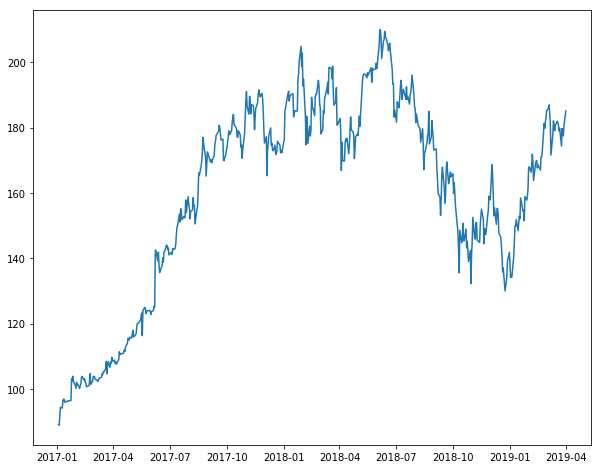

In [15]:
plt.figure(figsize=(10,8)) #,facecolor='blue'
plt.plot(prices.index, prices["Open"])
plt.show()

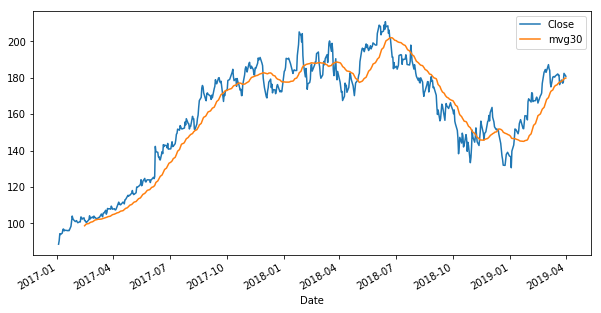

In [16]:
# 移动平均线
prices['mvg30'] = prices['Close'].rolling(window=30).mean()
prices[['Close', 'mvg30']].plot(kind='line', figsize=[10, 5], legend=True)
